In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
movies = pd.read_csv(r"E:\DATA SCIENCE-VANTHARR\Module-7 MACHINE LEARNING ADVANCED\KNN Project Movie recomendation\tmdb_5000_movies.csv")
credits = pd.read_csv(r"E:\DATA SCIENCE-VANTHARR\Module-7 MACHINE LEARNING ADVANCED\KNN Project Movie recomendation\tmdb_5000_credits.csv") 

In [ ]:
movies.head(2)

In [ ]:
movies.shape

In [ ]:
credits.head()

In [4]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head()
# budget
# homepage
# id
# original_language
# original_title
# popularity
# production_comapny
# production_countries
# release-date(not sure)

In [5]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [6]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [7]:
import ast

The ast (Abstract Syntax Tree) module in Python is used to process and analyze Python code by converting it into an abstract syntax tree (AST). 

This allows developers to parse, modify, and analyze Python code programmatically.

In [8]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

This function helps convert those string-based JSON objects into a usable Python list.
    
It is especially useful for extracting meaningful features like genres or keywords, which can be used to build content-based filtering models.

In [9]:
movies.dropna(inplace=True)

In [10]:
#movies['genres'].apply(convert)

#This applies the convert() function (explained earlier) to each row in the genres column.
#Since the genres column contains JSON-like strings, the convert() function will:
#Convert the string into a list of dictionaries using ast.literal_eval()
#Extract the "name" values (genre names) from the dictionaries
#Return a list of genre names.

movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [11]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [12]:
#Converts the string representation of a Python object (in this case, a list of dictionaries) into an actual Python object safely.
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [13]:
#What This Function Does
#Extracts at most three "name" values from a list of dictionaries stored as a string.
#Uses ast.literal_eval(text) to safely convert a string representation of a list of dictionaries into an actual Python list.
#Loops through the list and appends the "name" values to L, but only for the first three elements.
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

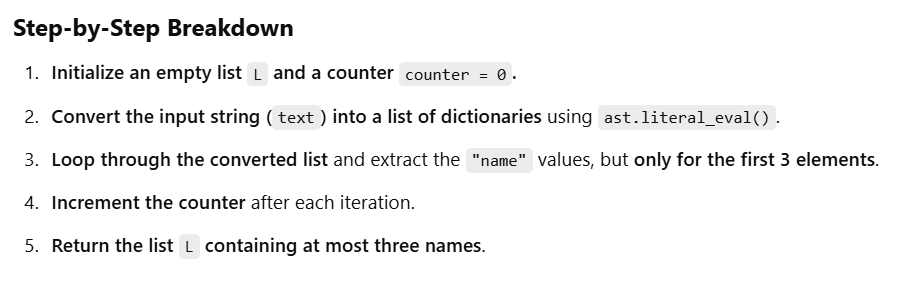

In [14]:
movies['cast'] = movies['cast'].apply(convert)
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [15]:
#This ensures that only the first three actors from the cast list are kept.
#If a movie has more than 3 cast members, it trims the list to just the top 3.

movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

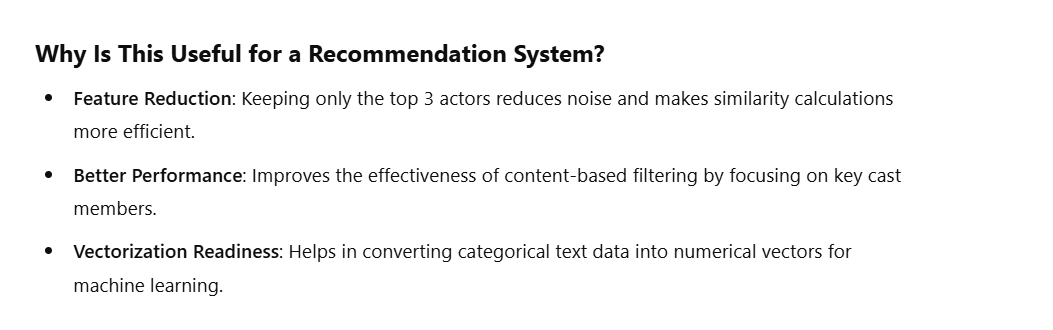

In [16]:

def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):  # Convert text to a Python list of dictionaries
        if i['job'] == 'Director':  # Check if the person's job is 'Director'
            L.append(i['name'])  # Append the director's name to the list
    return L


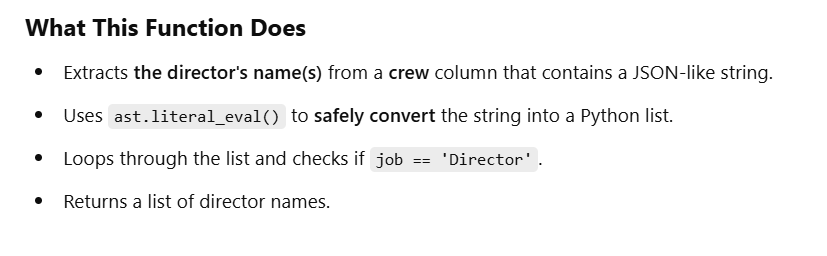

In [17]:
movies['crew'] = movies['crew'].apply(fetch_director)

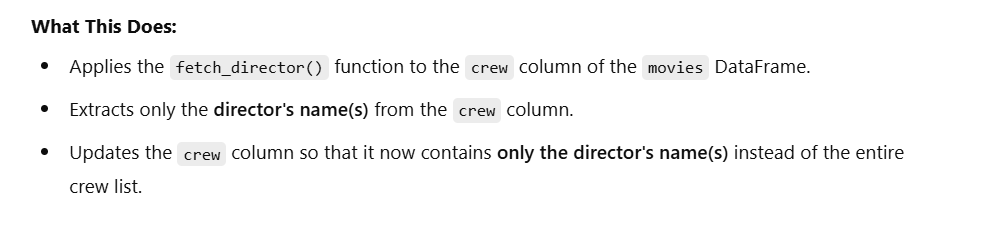

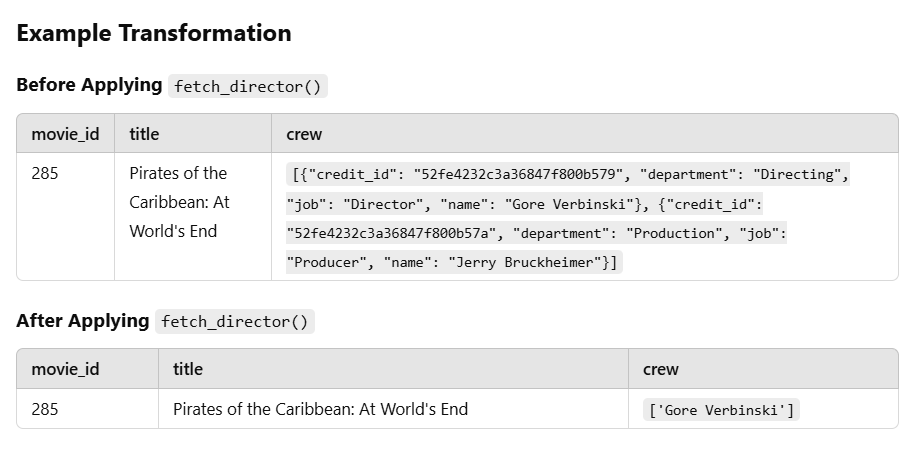

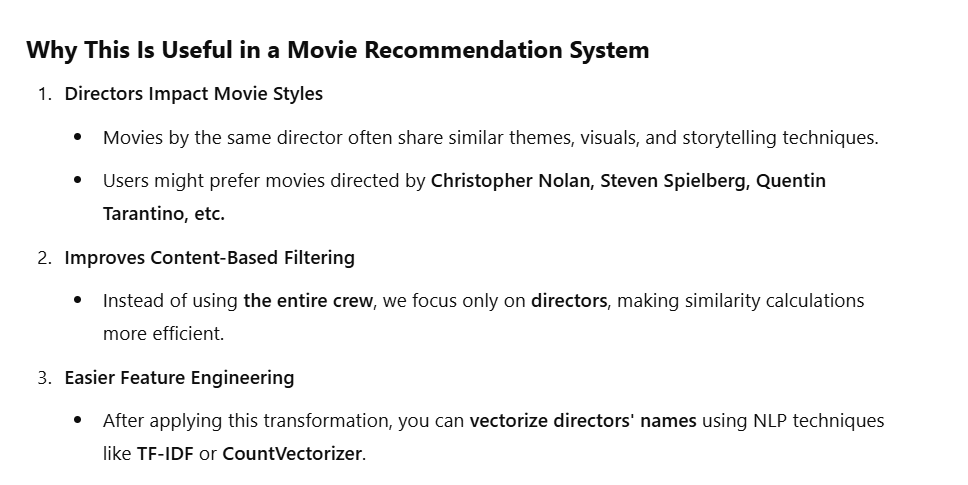

In [18]:
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
2357,333348,Love the Coopers,When four generations of the Cooper clan come ...,"[Comedy, Family]","[big family, family relationships, family, wom...","[Steve Martin, Diane Keaton, John Goodman]",[Jessie Nelson]
315,1734,The Mummy Returns,"Rick and Evelyn O'Connell, along with their 8 ...","[Adventure, Action, Fantasy]","[son, ancient egypt, bracelet]","[Brendan Fraser, Rachel Weisz, John Hannah]",[Stephen Sommers]
1095,11439,The Ghost Writer,A writer stumbles upon a long-hidden secret wh...,"[Thriller, Mystery]","[london england, cia, war crimes, tony blair, ...","[Ewan McGregor, Pierce Brosnan, Jon Bernthal]",[Roman Polanski]
302,41216,Legend of the Guardians: The Owls of Ga'Hoole,"Soren, a young barn owl, is kidnapped by owls ...","[Animation, Adventure, Family, Fantasy]",[owl],"[Emily Barclay, Abbie Cornish, Essie Davis]",[Zack Snyder]
1524,10253,Dragon Wars: D-War,"Based on the Korean legend, unknown creatures ...","[Fantasy, Drama, Horror, Action, Thriller, Sci...","[giant snake, korea, building, dagger, south k...","[Jason Behr, Robert Forster, Aimee Garcia]",[Shim Hyung-Rae]


In [19]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

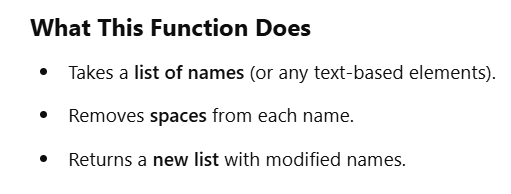

In [20]:
#Each column originally contains lists of names or words with spaces, and collapse() removes spaces within each entry.
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [ ]:
movies.head()

In [21]:
#This code modifies the overview column by splitting each movie's description into a list of words.
movies['overview'] = movies['overview'].apply(lambda x:x.split())

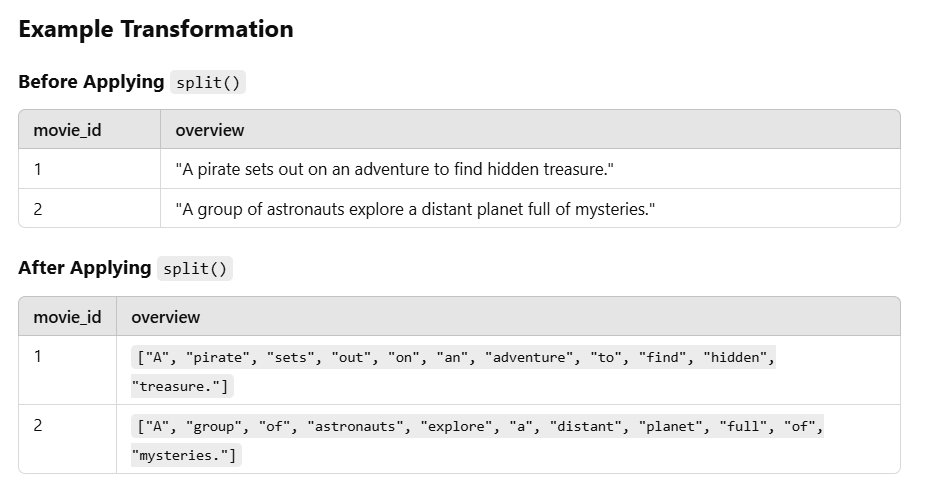

In [22]:
#This code combines multiple text-based features into a single column called tags. It helps in building a content-based movie recommendation system.
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

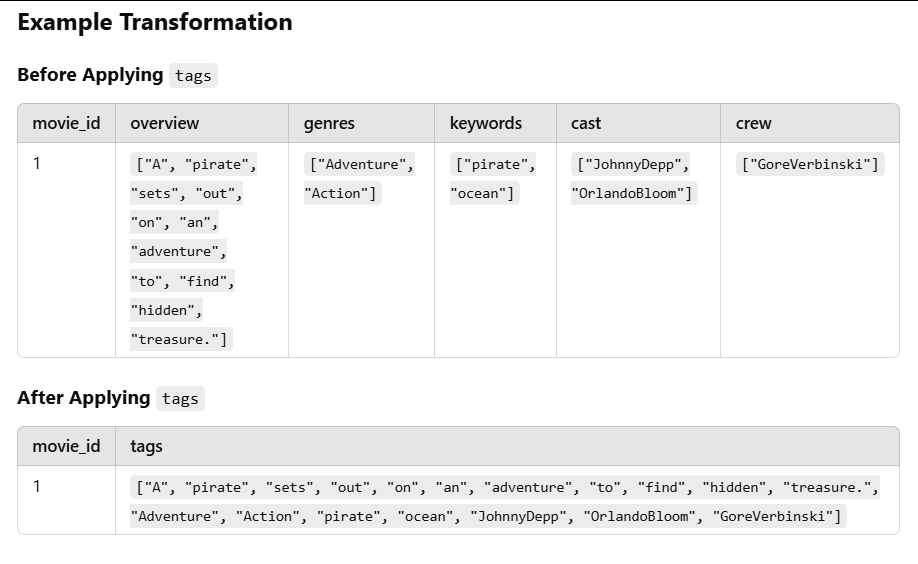

In [23]:
#This code removes unnecessary columns after creating the tags column.
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()

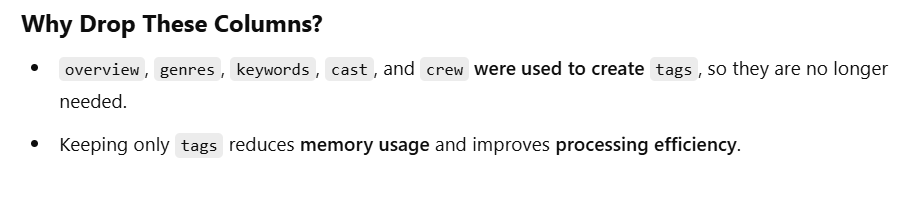

In [24]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


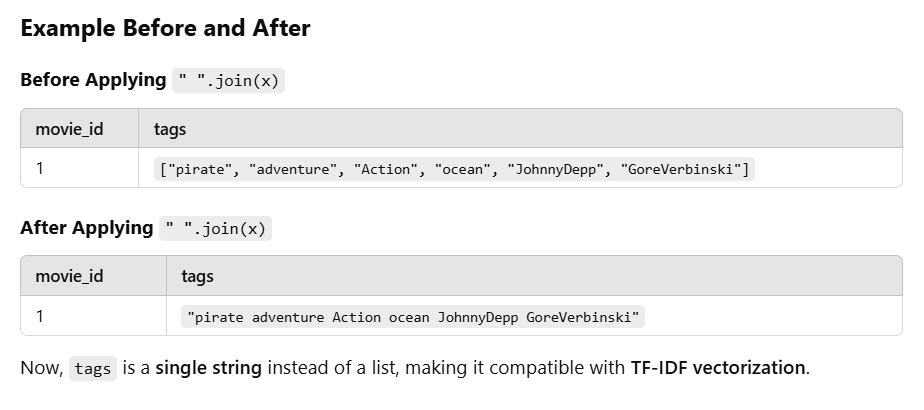

In [25]:
#This initializes a CountVectorizer, which converts text into numerical feature vectors based on word frequency (Bag-of-Words model).
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

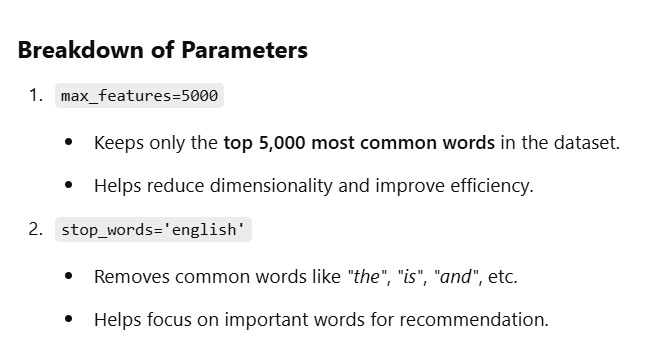

In [26]:
#This converts the tags column into a numerical matrix using the Bag-of-Words (BoW) model.
vector = cv.fit_transform(new['tags']).toarray()

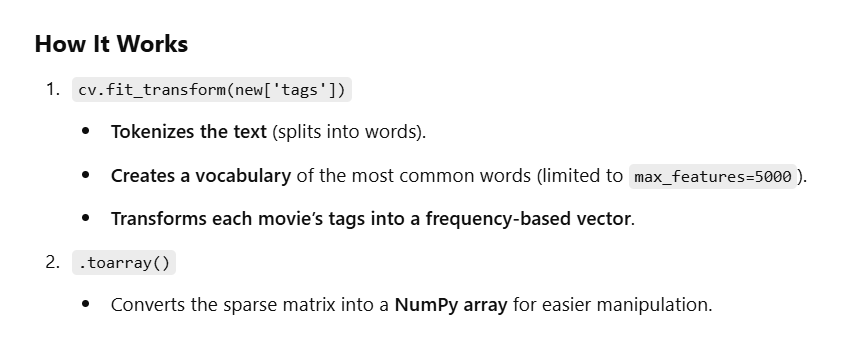

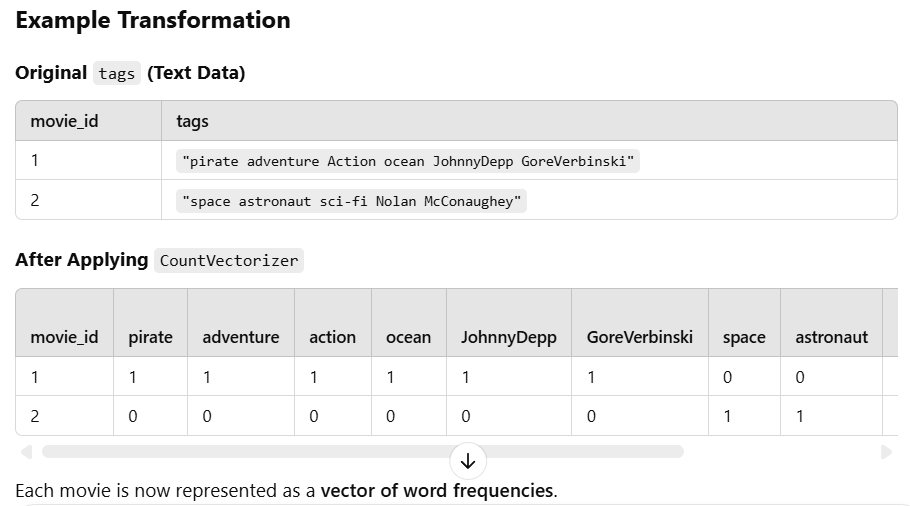

In [27]:
vector.shape

(4806, 5000)

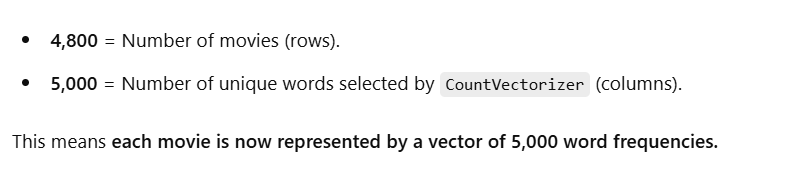

In [28]:
#This imports the cosine_similarity function, which helps measure how similar two movies are based on their tags vectors.

from sklearn.metrics.pairwise import cosine_similarity

In [29]:
similarity = cosine_similarity(vector)

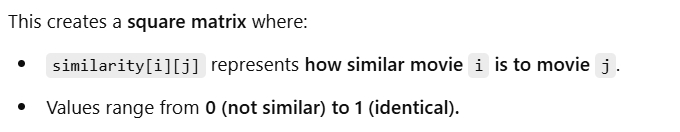

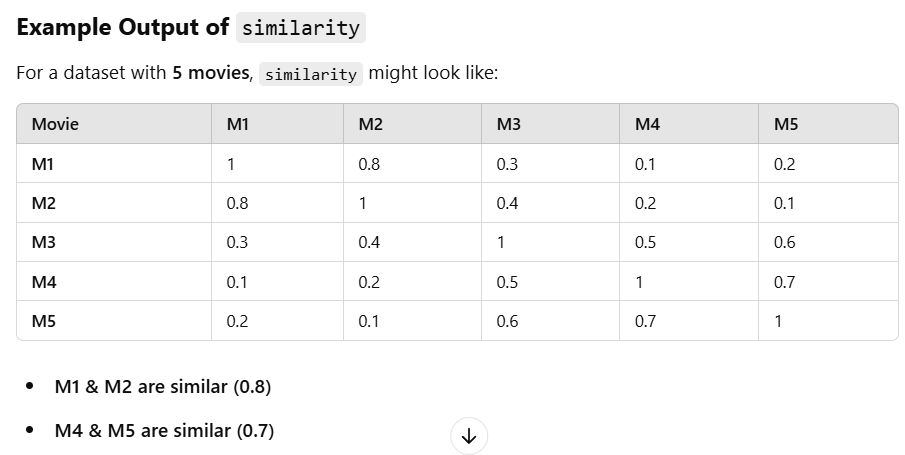

In [30]:
similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [31]:
new[new['title'] == 'The Lego Movie'].index[0]

744

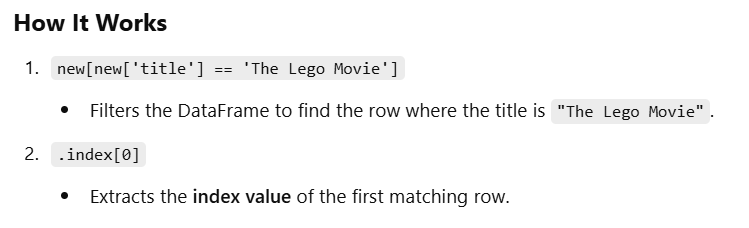

In [32]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)
        
    

# 1 Find the Index of the Given Movie
Searches for the movie title in the new DataFrame.
Retrieves its index.
# 2 Compute Similarity Scores
similarity[index] returns a list of similarity scores between the given movie and all other movies.

enumerate(similarity[index]) pairs each movie’s index with its similarity score.

sorted(..., reverse=True, key=lambda x: x[1]) sorts movies by highest similarity score.
# 3 Retrieve the Top 5 Similar Movies
Skips distances[0] because it’s the movie itself.

Retrieves and prints the titles of the top 5 most similar movies.


In [33]:
recommend('Gandhi')

Gandhi, My Father
The Wind That Shakes the Barley
A Passage to India
Guiana 1838
Ramanujan


In [38]:
import pickle

In [39]:
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [35]:
!pip install streamlit

  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.7 MB 8.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.7 MB 9.3 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.7 MB 9.2 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.7 MB 8.6 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.7 MB 7.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.6/9.7 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.7 MB 6.1 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.7 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 5.5

In [36]:
import streamlit as st
import pickle
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



In [40]:
# Load the movie data and similarity matrix (assumed precomputed)
movies = pickle.load(open('movie_list.pkl', 'rb'))  # Contains movie titles
similarity = pickle.load(open('similarity.pkl', 'rb'))  # Cosine similarity matrix



In [41]:
def recommend(movie):
    if movie not in movies['title'].values:
        return ["Movie not found. Please try another title."]
    
    index = movies[movies['title'] == movie_list].index[0]
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x: x[1])
    recommendations = [movies.iloc[i[0]].title for i in distances[1:6]]
    return recommendations



In [42]:
# Streamlit UI
st.title("Movie Recommendation System")
movie_name = st.text_input("Enter a movie name:")

if st.button("Recommend"):
    recommendations = recommend(movie_name)
    st.write("### Recommended Movies:")
    for rec in recommendations:
        st.write(f"- {rec}")


2025-03-21 19:17:39.914 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.290 
  command:

    streamlit run D:\jupyter_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-21 19:17:40.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.302 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 19:17:40.302 Session state does not function w

In [45]:
movies.sample(50)

,movie_id,title,tags
1575,16300,Down to Earth,"After dying before his time, an aspiring comic..."
1887,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
3093,68812,The Iceman,"The true story of Richard Kuklinski, the notor..."
1209,71864,The Odd Life of Timothy Green,A childless couple bury a box in their backyar...
2173,328387,Nerve,"Industrious high school senior, Vee Delmonico,..."
650,345,Eyes Wide Shut,"After Dr. Bill Hartford's wife, Alice, admits ..."
3473,1523,The Last King of Scotland,"Young Scottish doctor, Nicholas Garrigan decid..."
3264,15049,Bon Cop Bad Cop,When the body of the executive of hockey Benoi...
3210,43418,Beneath Hill 60,The true story of Australia's cat-and-mouse un...
4619,8942,Wendy and Lucy,"Wendy, a near-penniless drifter, is traveling ..."
